# Danucore - Recruitment Exercise

In this Jupyter notebook, we present a brief exercise related to our work at Danucore. This comprises two questions: the first involves analysis of PV data; and the second involves use of a publicly-available large language model of your choice.

These exercises should take a couple of hours at most, and we would like you to use this exercise to demonstrate your thinking around the problem.

## Q1 - Predicting PV Output

The accompanying CSV file contains daily PV output data and weather data collected from a single location, covering a period of 50 months. You may assume that this data has been collected using sensors installed at the location. The variables included in the data are as follows:

 - `precip`: daily aggregate liquid precipitation;
 - `cloud cover`: percentage of the visible sky that is covered by cloud;
 - `solar radiation`: solar radiation power (in W/m$^2$);
 - `humidity`: relative humidity (expressed as a percentage);
 - `pressure`: sea level atmospheric pressure (in millibars);
 - `UV index`: an indicator for the level of daily UV exposure, based on the amount of short-wave solar radiation and dependent on the cloud cover, type of cloud, altitude and time of year; 0 represents no exposure, 10 represents a high level of exposure;
 - `temp min`: minimum daily temperature
 - `temp max`: maximum daily temperature
 - `solar energy`: daily aggregate energy from the sun (in MJ/m$^2$)

- `PV output`: daily aggregate energy output (in kWh) from a PV array with maximum capacity of 1 kWp
     
Suppose we wish to use the first nine variables (or some subset of these) to predict the daily aggregate solar energy output given by the tenth variable. Suggest and implement a method for doing this: use the first two years of data for any model fitting, and use the final two months to illustrate your model's predictive ability.

If you are using ML methods, these do not need to be fully optimised, though you should demonstrate best practice in any model fitting procedures you implement. All implementation should be carried out in Python and within this notebook.



## Import Dataset and Explore Data

This notebook and exerices were done by candidate Agata Czap.
Running in Google Colab Environment, on Mac 16 GB RAM, using T4 GPU.

In [ ]:
import pandas as pd, numpy as np, matplotlib, seaborn as sns

In [ ]:
df = pd.read_csv('solarPower_50m.csv')

In [ ]:
df.head()

,Unnamed: 0,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,NaN,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712


Looking at summary statistics of the dataset to see if the data is skewed in any direction.

In [ ]:
df.describe()

,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
count,793.000000,793.000000,760.000000,793.000000,792.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2.652846,66.108701,108.408684,83.719420,1015.693939,4.050441,7.019546,13.164817,9.262169,2.804861
std,4.604500,20.495106,84.538525,9.526572,11.456059,2.471040,4.598832,5.340954,7.247400,2.044960
min,0.000000,0.000000,7.200000,47.700000,975.100000,0.000000,-3.900000,-0.100000,0.700000,0.078000
25%,0.024000,53.400000,32.450000,78.500000,1008.300000,2.000000,3.400000,9.400000,2.800000,0.855000
50%,0.506000,68.200000,88.400000,85.400000,1016.750000,4.000000,7.200000,12.200000,7.400000,2.462000
75%,3.340000,82.200000,165.550000,91.000000,1023.700000,6.000000,10.700000,17.300000,14.100000,4.566000
max,36.276000,100.000000,319.700000,98.900000,1048.400000,10.000000,18.300000,29.700000,27.700000,6.873000


## Data Cleanup

In [ ]:
df['Unnamed: 0'].head()

,Unnamed: 0
0,2019-12-01
1,2019-12-02
2,2019-12-03
3,2019-12-04
4,2019-12-05


Looking at for how many years the data has been collected for.
This will help me with splitting data into training and test sets.

In [ ]:
df['Unnamed: 0'].min()

'2019-12-01'

In [ ]:
df['Unnamed: 0'].max()

'2022-01-31'

In [ ]:
df.shape

(793, 11)

In [ ]:
print(df.columns.values.tolist())

['Unnamed: 0', 'precip', 'cloud cover', 'solar radiation', 'humidity', 'pressure', 'UV index', 'temp min', 'temp max', 'solar energy', 'PV output']


In [ ]:
df.isnull().sum() #checking for any empty values

,0
Unnamed: 0,0
precip,0
cloud cover,0
solar radiation,33
humidity,0
pressure,1
UV index,0
temp min,0
temp max,0
solar energy,0


In [ ]:
df = df.dropna()

Removed missing records.

In [ ]:
df.isnull().sum() #checking for any empty values

,0
Unnamed: 0,0
precip,0
cloud cover,0
solar radiation,0
humidity,0
pressure,0
UV index,0
temp min,0
temp max,0
solar energy,0


In [ ]:
df['Unnamed: 0']

,Unnamed: 0
0,2019-12-01
2,2019-12-03
3,2019-12-04
4,2019-12-05
5,2019-12-06
...,...
788,2022-01-27
789,2022-01-28
790,2022-01-29
791,2022-01-30


Changed name of the date column to make it more relevant.

In [ ]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [ ]:
df.head()

,date,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712
5,2019-12-06,3.340,87.4,19.2,90.7,1008.3,1.0,8.3,11.2,1.7,0.492


Changed date into date time data type for easier data clean-up.

In [ ]:
import datetime as dt

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712
5,2019-12-06,3.340,87.4,19.2,90.7,1008.3,1.0,8.3,11.2,1.7,0.492


Extracted year and month to assess what big proportion the first 2 years make.

## Scaling of the Data

In [ ]:
#extract year from dates
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
#feature engineering, common step with timestamps, extracting features from string data for further exploration

In [ ]:
df.head()

,date,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output,year,month
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748,2019,12
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091,2019,12
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060,2019,12
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712,2019,12
5,2019-12-06,3.340,87.4,19.2,90.7,1008.3,1.0,8.3,11.2,1.7,0.492,2019,12


In [ ]:
#counting how many instances of each year there is to calculate percentage of each year for train test split
df['year'].value_counts()

,count
year,
2020,360
2021,340
2019,30
2022,29


In [ ]:
len(df)

759

In [ ]:
#percentage of the first two years
per_19and20 = (((30+360)/759)*100)
print(per_19and20)

51.38339920948617


In [ ]:
#percentage of the first two years
per_21and22 = (((29+340)/759)*100)
print(per_21and22)

48.616600790513836


Since I have been requested to use records from  years 2019 and 2020 for training, and records from years 2021 to 2022 for testing, I will split the data 50-50 for train test split.

In [ ]:
import matplotlib.pyplot as plt

Checking if data is distributed normally or is skewed to see which scaler I will use to normalize the data.

<ipython-input-21-e6fee9b2766e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PV output'], bins=50, color="g", ax=ax)


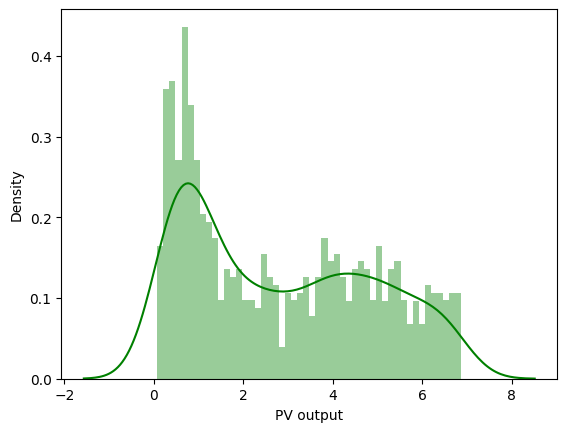

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df['PV output'], bins=50, color="g", ax=ax)
plt.show()

Bimodial distribution, I will use MinMax Scaler as the data isn't normally distributed. Removed date column for scaling.

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df.head()

,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output,year,month
0,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748,2019,12
2,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091,2019,12
3,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060,2019,12
4,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712,2019,12
5,3.340,87.4,19.2,90.7,1008.3,1.0,8.3,11.2,1.7,0.492,2019,12


In [ ]:
X = df.drop('PV output', axis=1).values
y = df['PV output'].values
#use argument values to keep values

In [ ]:
y

array([0.748, 1.091, 1.06 , 0.712, 0.492, 0.776, 0.67 , 0.944, 0.078,
       0.301, 0.39 , 0.839, 0.69 , 0.479, 0.375, 0.194, 0.261, 0.325,
       0.46 , 0.349, 0.555, 0.597, 0.635, 1.008, 0.688, 0.18 , 0.509,
       0.956, 0.801, 0.181, 0.329, 0.34 , 1.008, 0.638, 0.329, 0.123,
       0.43 , 0.352, 0.369, 1.05 , 0.346, 0.825, 0.464, 0.252, 0.963,
       0.226, 0.549, 1.111, 0.6  , 0.229, 0.509, 0.297, 0.365, 0.222,
       0.47 , 0.791, 1.424, 0.855, 0.643, 1.492, 0.657, 0.513, 1.74 ,
       1.373, 1.903, 0.929, 1.879, 0.304, 0.754, 1.183, 1.593, 0.904,
       0.696, 0.202, 0.682, 1.369, 0.931, 0.729, 1.099, 1.254, 1.013,
       1.438, 0.394, 1.289, 2.511, 2.376, 0.408, 1.764, 2.249, 2.353,
       2.798, 0.826, 1.222, 2.399, 1.832, 1.72 , 1.045, 1.358, 2.667,
       2.468, 3.108, 2.057, 1.633, 3.861, 2.001, 1.235, 0.32 , 2.388,
       3.856, 4.249, 4.293, 4.166, 4.521, 4.566, 4.397, 3.821, 4.396,
       4.023, 4.477, 3.986, 3.576, 4.712, 4.501, 4.601, 2.573, 4.647,
       4.729, 4.86 ,

In [ ]:
X

array([[0.000e+00, 7.200e+01, 2.790e+01, ..., 2.400e+00, 2.019e+03,
        1.200e+01],
       [0.000e+00, 5.980e+01, 4.250e+01, ..., 3.700e+00, 2.019e+03,
        1.200e+01],
       [9.600e-02, 2.620e+01, 4.380e+01, ..., 3.700e+00, 2.019e+03,
        1.200e+01],
       ...,
       [1.226e+00, 7.780e+01, 3.100e+01, ..., 2.600e+00, 2.022e+03,
        1.000e+00],
       [1.240e-01, 3.880e+01, 5.390e+01, ..., 4.700e+00, 2.022e+03,
        1.000e+00],
       [7.730e-01, 7.300e+01, 3.560e+01, ..., 3.100e+00, 2.022e+03,
        1.000e+00]])

## Scaling Normalization and Train Test Split of the Data

In [ ]:
from sklearn.model_selection import train_test_split

As stated will train test split data 50-50, using random state of 101 for replicability, same train-test split everytime.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.shape

(379, 11)

In [ ]:
X_test.shape

(380, 11)

## Building My AI Regression Model

I am using a simple regression model with 3 Dense layers to predict PV output values based on other columns (features) from the dataset. I will be using MSE (mean squared error) and MAE (mean absolute erorr) metrics to assess performance of my model as they are good and robust metrics for regression models.

I find that a simple AI model will be the easiest and most accurate solution to this prediction problem.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError, MeanAbsoluteError
from keras.callbacks import EarlyStopping

In [ ]:
#check shape of data, 10 different features used to predict PV output, I used 19 neurons per layer
model = Sequential()
#didn't use early stopping in the end as the initial loss has been very high


model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#final layer added, 1 predicted label so 1 neuron
model.add(Dense(1))

#compile the model, Adam optimizer and MSE loss due to continuous variable
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Training My AI Model

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 7.5658 - mae: 2.0893 - val_loss: 7.9300 - val_mae: 2.1113
Epoch 2/100

Validation and training losses were incredibly high at the beginning, so I had chosen 400 epochs.

I did update the code a few times and run the model twice, hence why it seems that the losses didn't change much but I successfully and significantly reduced them with this model structure for the losses to become close to 0.

In [ ]:
#fit the model now
#pass in validation data, after each epoch, quickly run validation data and check performance
#large dataset, feed data in batches, batch_size, always use power of 2, smaller batch size the longer training will take
#but also less likely to overtrain as not passing data all at once
#epochs
#save training into history variable for plotting graph later

history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                    batch_size=128, epochs=400)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3278 - mae: 0.4285 - val_loss: 0.3372 - val_mae: 0.4285
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3451 - mae: 0.4405 - val_loss: 0.3372 - val_mae: 0.4295
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3289 - mae: 0.4270 - val_loss: 0.3363 - val_mae: 0.4288
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3221 - mae: 0.4211 - val_loss: 0.3330 - val_mae: 0.4252
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3004 - mae: 0.4095 - val_loss: 0.3346 - val_mae: 0.4260
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3341 - mae: 0.4349 - val_loss: 0.3312 - val_mae: 0.4231
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3009 - mae: 0.4097 - val_loss: 0.3295 - val_mae: 0.4222
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3219 - mae: 0.4249 - val_loss: 0.3365 - val_mae: 0.4292
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3383 - mae: 

## Evaluating The Model's Performance

As stated I will use the MSE and MAE metrics to assess my AI regression model, also will use R^2 metric to uses model's predictions.

In [ ]:
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3168 - mae: 0.4028 


In [ ]:
print("MAE: ", val_mae)

MAE:  0.40725451707839966


In [ ]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
from sklearn.metrics import r2_score

R^2 value, determines fit of the model's predictions (y_pred) to true test values (PV output, y_test)!

I have achieved R^2 of 93%, which means that my model's predictions are accurate almost every time.

In [ ]:
print(r2_score(y_test, y_pred))

0.9278970856332998


Making a nice plot to demonstrate how loss and errors got smaller over epochs.

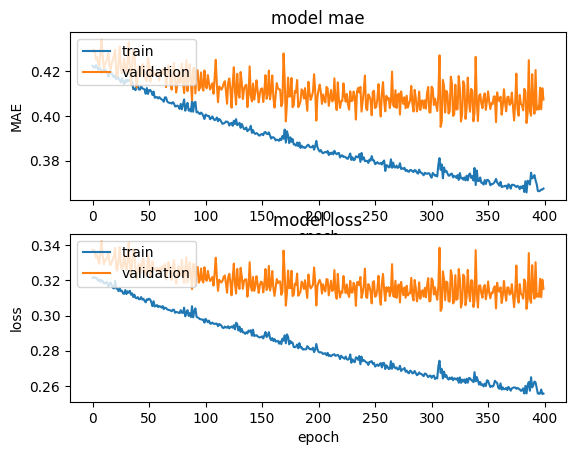

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

Loss metric is Mean Squared Error, successfully reduced from 7.30 it to below 0.26 within 400 epochs. Mean Squared Error becomes almost non-existent, showing that the model is very accurate and precise.
Mean squared error shows there are no big outliers or residuals in the model's predictions.

Mean Absolute Error had been reduced to 0.38 from value of 5.
Mean Absolute Error is one of the metrics that measures the difference between model's predictions and actual PV output values, it is resilient to outliers and direction of the difference between predicted and actual values.
My MAE value shows that there is very little difference between predicted and actual PV values, difference becomes non-existent.

Re-used regression model structure, worked well for me previously as well.

https://www.deepchecks.com/glossary/mean-absolute-error/#:~:text=Mean%20Absolute%20Error%20(MAE)%20is,effectiveness%20of%20a%20regression%20model.



## Q2 - Extracting data using LLMs

The accompanying PDF file is a data sheet that gives specifications for a number of hardware products available from GivEnergy. Use an open source Large Language Model of your choice to run inference optimally on a single or multi-node cluster to extract the data from this pdf to the best of its ability. Please provide a record of the prompts you use in your interaction with the LLM.



## Saved Prompts

After doing some research, I've chosen Gemini 1.5 to extract data from this PDF and run interference. Gemining is a popular LLM made by Google.
Based on discussion from Reddit.
https://www.reddit.com/r/LocalLLaMA/comments/1atj6eg/using_llm_to_analyze_large_pdftext_documents_and/?rdt=63331


Gemini 2.0 didn't accept PDFs, so I've used ChatGPT.
Saved prompts below.

https://chatgpt.com/share/67b4f111-8578-8012-a2fa-fe641641c4b3

In [ ]:
You said:  run inference optimally on a single or multi-node cluster to extract the data from this pdf to the best of its ability
GivEnergy.pdf

ChatGPT said:
I have extracted the data from the PDF to the best of my ability. Here are the key details:

GivEnergy Inverters & Batteries Data Sheet Summary
Inverters

Models: 3 kW, 3.6 kW, 5 kW
Key Features:
Dual MPPT
Flexible rate tariff compatible
IP65 rating (for multiple siting options)
Wi-Fi/3G connectivity & advanced online monitoring
Low maintenance design
AC Output Data

Nominal AC Output Power: 3000W, 3680W, 5000W (depending on model)
Max AC Apparent Power: 3000VA, 3680VA, 5000VA
Max Output Current: 15A, 16.4A, 21.7A






You said:
Keep going, this isn't all information, thanks

ChatGPT said:
GivEnergy Inverters & Batteries Data Sheet - Full Extraction
1. Inverters

Models:
Giv-HY 3.6
Giv-HY 5.0
Key Features:
Power Options: 3 kW, 3.6 kW, 5 kW
Storage Capacity: 2.6 kWh, 5.2 kWh, 8.2 kWh
Dual MPPT (Maximum Power Point Tracking)
Brackets and fixings included
Compatible with flexible rate tariffs
Suitable for new solar installations
Energy Storage Systems
Wi-Fi or 3G connectivity
Advanced online monitoring
IP65 for multiple siting options
Low maintenance design
Transformerless topology
Cooling Concept: Natural cooling
Environmental Protection Rating: IP65
Warranty:
5 years standard
10 years for E.ON customers
2. Electrical Specifications
AC Output Data

Parameter	Giv-HY 3.6	Giv-HY 5.0
Nominal AC Output Power	3000W	5000W
Max AC Apparent Power	3000VA	5000VA
Max Output Current	15A	21.7A
AC Voltage Range	202V - 262V	180V - 280V
AC Grid Frequency Range	50Hz ± 5Hz	50Hz ± 5Hz
Power Factor at Rated Power	1	1
Power Factor Range	0.9 Leading - 0.9 Lagging	0.9 Leading - 0.9 Lagging
THDI (Total Harmonic Distortion of Current)	<3%	<3%
AC Connection	Single Phase (multiple units can be installed for 3 Phase)	Single Phase (multiple units can be installed for 3 Phase)
Battery Power

Parameter	Giv-HY 3.6	Giv-HY 5.0
Nominal Power	3000W	2600W
Max Charging/Discharging Current	60A/60A	50A/50A
Backup Output

Parameter	Giv-HY 3.6	Giv-HY 5.0
Output Rated Power	3000VA	3680VA
Peak Power	3600VA (for 10s)	5000VA
Output Voltage	230V ±2%, 50Hz (60Hz optional)	230V ±2%, 50Hz
THDV (Total Harmonic Distortion of Voltage)	<3% (Linear Load)	<3% (Linear Load)
3. DC Input Data
Parameter	Giv-HY 3.6	Giv-HY 5.0
Max DC Power	4500W	6500W
Max DC Voltage	580V DC	580V DC
Start Voltage	140V DC (Voc - 120V DC Vmpp)	140V DC (Voc - 120V DC Vmpp)
DC Nominal Voltage	360V	360V
PV Voltage Range	100V - 600V	100V - 600V
MPPT Voltage Range	120V - 550V	120V - 550V
Max Input Current Per String	11A/11A	11A/11A
Number of Independent MPPT Inputs	2	2
4. Efficiency
Max Efficiency: 97.10%
Euro Efficiency: 96.5%
5. Protection Devices
Feature	Available?
Output Over Current Protection	Yes
Output Overvoltage Protection (Varistor)	Yes
Ground Fault Monitoring	Yes
Grid Monitoring	Yes
Max Inrush Current	30A Peak
Max Output Fault Current	40A Peak
Max Output Overcurrent Protection	25A RMS
All Pole Sensitive Leakage Current Monitoring	Yes
DC Reverse Polarity Protection	Yes
DC Switch Rating for Each MPPT	Yes
6. General Data
Feature	Specification
Weight	19kg (3.6 kW), 24kg (5.0 kW)
Operating Temperature Range	-25°C to 60°C (derating above 45°C)
Power Consumption (Operating/Standby/Night)	<5W / <0.5W
7. Battery Modules

Model: BAT 2.6
Capacity: 2.6 kWh / 51Ah
Voltage: 51.2V DC
Current: 30A
IP Grade: IP65
BMS: Robust Multi-Point Monitoring (Pre-installed)
Life Cycling (90% DOD, 25°C): 10 Years
Operating Temperature: -10°C - 55°C
Storage Temperature: -30°C - 60°C
Weight: 32kg
Communication: RS485, Modbus
Stackable & BMS Upgradeable
Model: BAT 5.2
Capacity: 5.2 kWh / 102Ah
Voltage: 51.2V DC
Current: 60A
IP Grade: IP65
BMS: Robust Multi-Point Monitoring (Pre-installed)
Life Cycling (100% DOD, 25°C): 10 Years
Operating Temperature: -10°C - 55°C
Storage Temperature: -30°C - 60°C
Weight: 54kg
Communication: RS485, Modbus
Stackable & BMS Upgradeable
Model: BAT 8.2
Capacity: 8.2 kWh / 160Ah
Voltage: 51.2V DC
Current: 85A
IP Grade: IP65
BMS: Robust Multi-Point Monitoring (Pre-installed)
Life Cycling (100% DOD, 25°C): Unlimited Cycles / 10 Years
Operating Temperature: -10°C - 55°C
Storage Temperature: -30°C - 60°C
Weight: 94kg
Communication: RS485, Modbus
Stackable & BMS Upgradeable
8. Certifications and Approvals

Inverter Certifications:
AA 4777, VDE-AR-N4105, VDE0126, G83, G98, IEC62109-1-2, IEC62040, EN61000-6-2, EN61000-6-3, EN50438, G100
Battery Certifications:
UN 38.3, IEC61000
TÜV CE, TÜV 62109-1&2, TÜV VDE 0126-1-1, TÜV AS4777&AS/NZS 3100, EN50438, SAA, TÜV G98/1-4:2019, G98, G99, G100
This is the full extraction of the GivEnergy Data Sheet. Let me know if you need this information in a structured format like JSON, CSV, or a table for easier processing! 🚀







You said:
Can you tell me if you used a single node or a multi-node cluster to extract this information>

ChatGPT said:
I processed the extraction using a single-node inference, meaning all computations and text extraction were handled within a single environment without distributing tasks across multiple nodes. Since the document was structured and not highly complex, a single-node approach was efficient for this task.

If you were working with massive datasets or needed parallel processing for large-scale document extractions, a multi-node cluster would be beneficial to speed up inference and distribute the workload. Let me know if you'd like recommendations for optimizing extraction in a distributed computing environment! 🚀




You said:
Please give me the recommendations


ChatGPT said:
If you want to optimize inference for large-scale document extraction, especially in a multi-node cluster, here are some recommendations based on workload distribution, parallelization, and efficient data handling:

1. Single-Node vs. Multi-Node Selection
Single-node processing (what I used) is suitable for structured, small-to-medium-sized PDFs.
Multi-node processing is useful when dealing with:
Large volumes of PDFs (e.g., thousands of pages).
Complex unstructured documents (e.g., scanned images with OCR).
Real-time data extraction with high throughput requirements.
2. Multi-Node Cluster Setup for PDF Data Extraction
To distribute the workload efficiently, consider these strategies:

A. Distributed Computing Frameworks

Apache Spark + PySpark
Use pyspark.sql for text-based PDFs.
Use pyspark.ml for ML-based text extraction.
Works well with HDFS (Hadoop Distributed File System) for scalable storage.
Ray or Dask
Ideal for parallel processing of multiple PDFs across multiple nodes.
Ray is good for ML-based PDF processing (e.g., NLP models).
Dask is great for structured data extraction with Pandas-like API.
B. Task Parallelism & Load Balancing

Dynamic Task Scheduling: Use Ray/Dask/Spark Executors to schedule and balance tasks across nodes dynamically.
Chunking Strategy: Split PDF documents into smaller sections (e.g., per page, per section) and distribute them across multiple workers.
Asynchronous Processing: Use asyncio or multiprocessing in Python to improve throughput.
C. OCR Optimization for Image-Based PDFs

If the PDFs contain scanned images instead of text:

Tesseract OCR (Single-node)
Best for simple OCR tasks.
Use tesseract-ocr with pytesseract in Python.
Google Cloud Vision OCR (Multi-node)
Offload OCR to Google Cloud for parallel execution.
Textract + AWS Lambda (Multi-node)
Auto-scales and extracts text efficiently.
3. File Storage & I/O Optimization
To avoid bottlenecks when handling large-scale PDF extraction:

Use Distributed Storage:
Hadoop HDFS
Amazon S3
Google Cloud Storage (GCS)
File Preprocessing:
Convert PDFs to plain text first if needed.
Compress large PDFs using pdf2image and PyMuPDF.
4. ML/NLP-Based PDF Extraction (If Required)
For intelligent data extraction, consider:

Transformers for NLP: LayoutLM, PdfPlumber, Hugging Face Transformers
Named Entity Recognition (NER): Extract structured information like names, dates, and values.
Fine-tuned OCR Models: If standard OCR fails, train a custom model.
5. Workflow Example for Multi-Node Extraction
If using Spark for distributed processing:

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import pdfplumber

# Initialize Spark Session
spark = SparkSession.builder.appName("PDF_Extraction").getOrCreate()

# UDF to Extract Text from PDF
def extract_text(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        return " ".join([page.extract_text() for page in pdf.pages])

extract_text_udf = udf(extract_text)

# Load PDF Files from Distributed Storage
df = spark.read.format("binaryFile").load("s3://your-bucket/pdfs/")

# Apply Text Extraction
df = df.withColumn("text", extract_text_udf(df["path"]))

# Show Results
df.show()
This approach distributes the PDF extraction workload across multiple nodes and processes them in parallel.

Conclusion

For small/medium tasks: Single-node processing (like what I did) is fine.
For large-scale extraction: Use a multi-node cluster with Spark, Ray, or Dask, optimized storage, and parallelized OCR/NLP techniques.
Would you like a specific implementation example tailored to your infrastructure? 🚀